

╔====================================================================╗
║               RÉSEAUX SÉMANTIQUES - EXERCICES                      ║
╚====================================================================╝


EXERCICE 1 : Réseau Sémantique - La Chauve-souris

✓ Graphique sauvegardé : exercice1_reseau_semantique.png


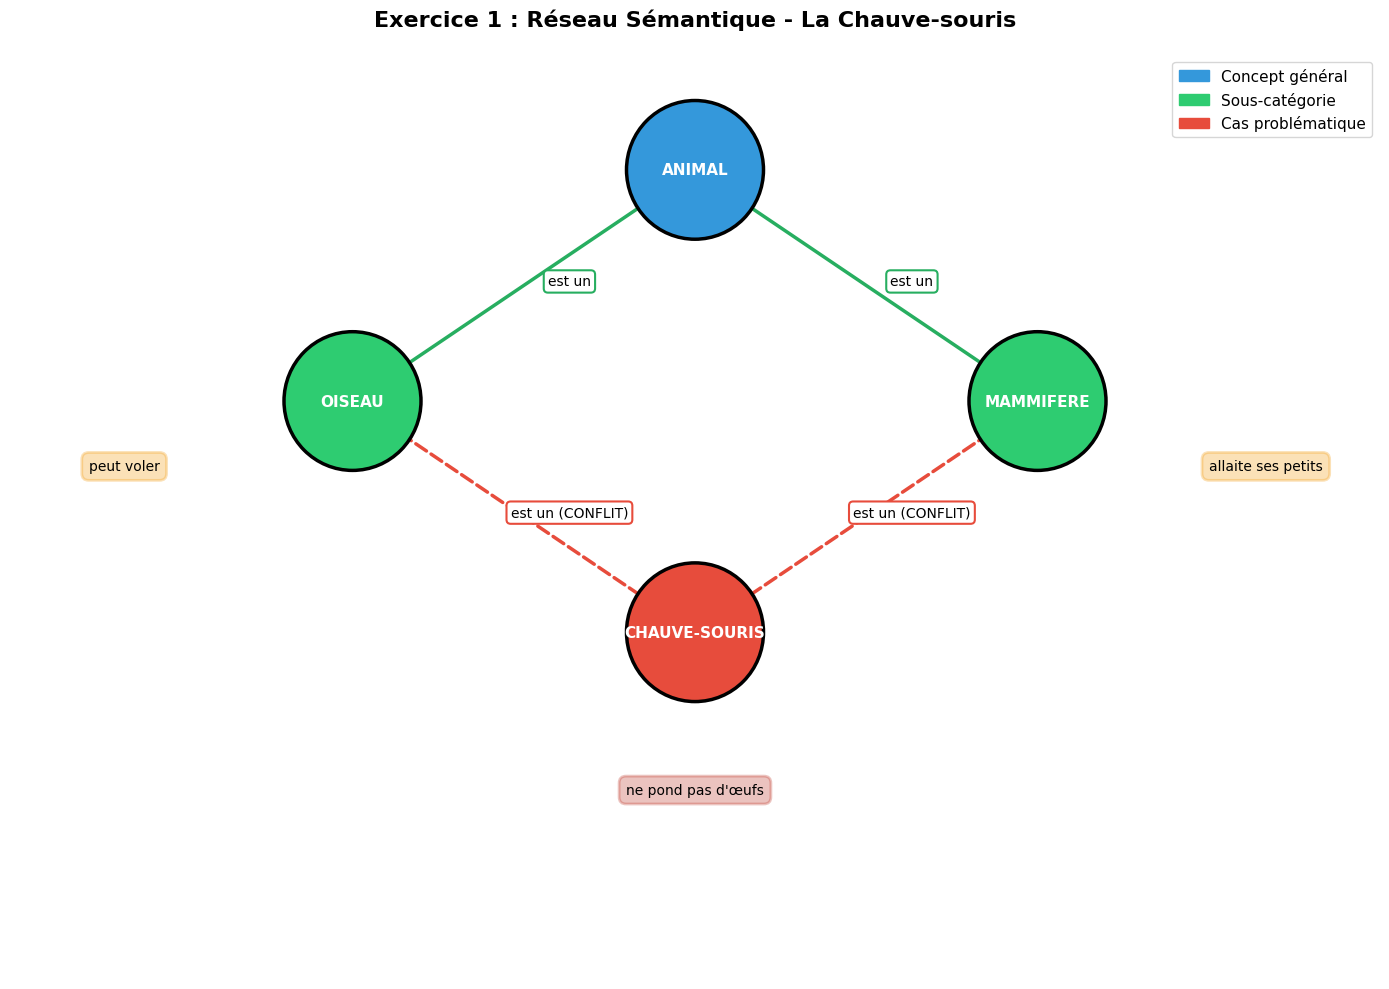


----------------------------------------------------------------------

EXERCICE 2 : Les Dauphins peuvent nager - Démonstration

✓ Graphique sauvegardé : exercice2_demonstration.png


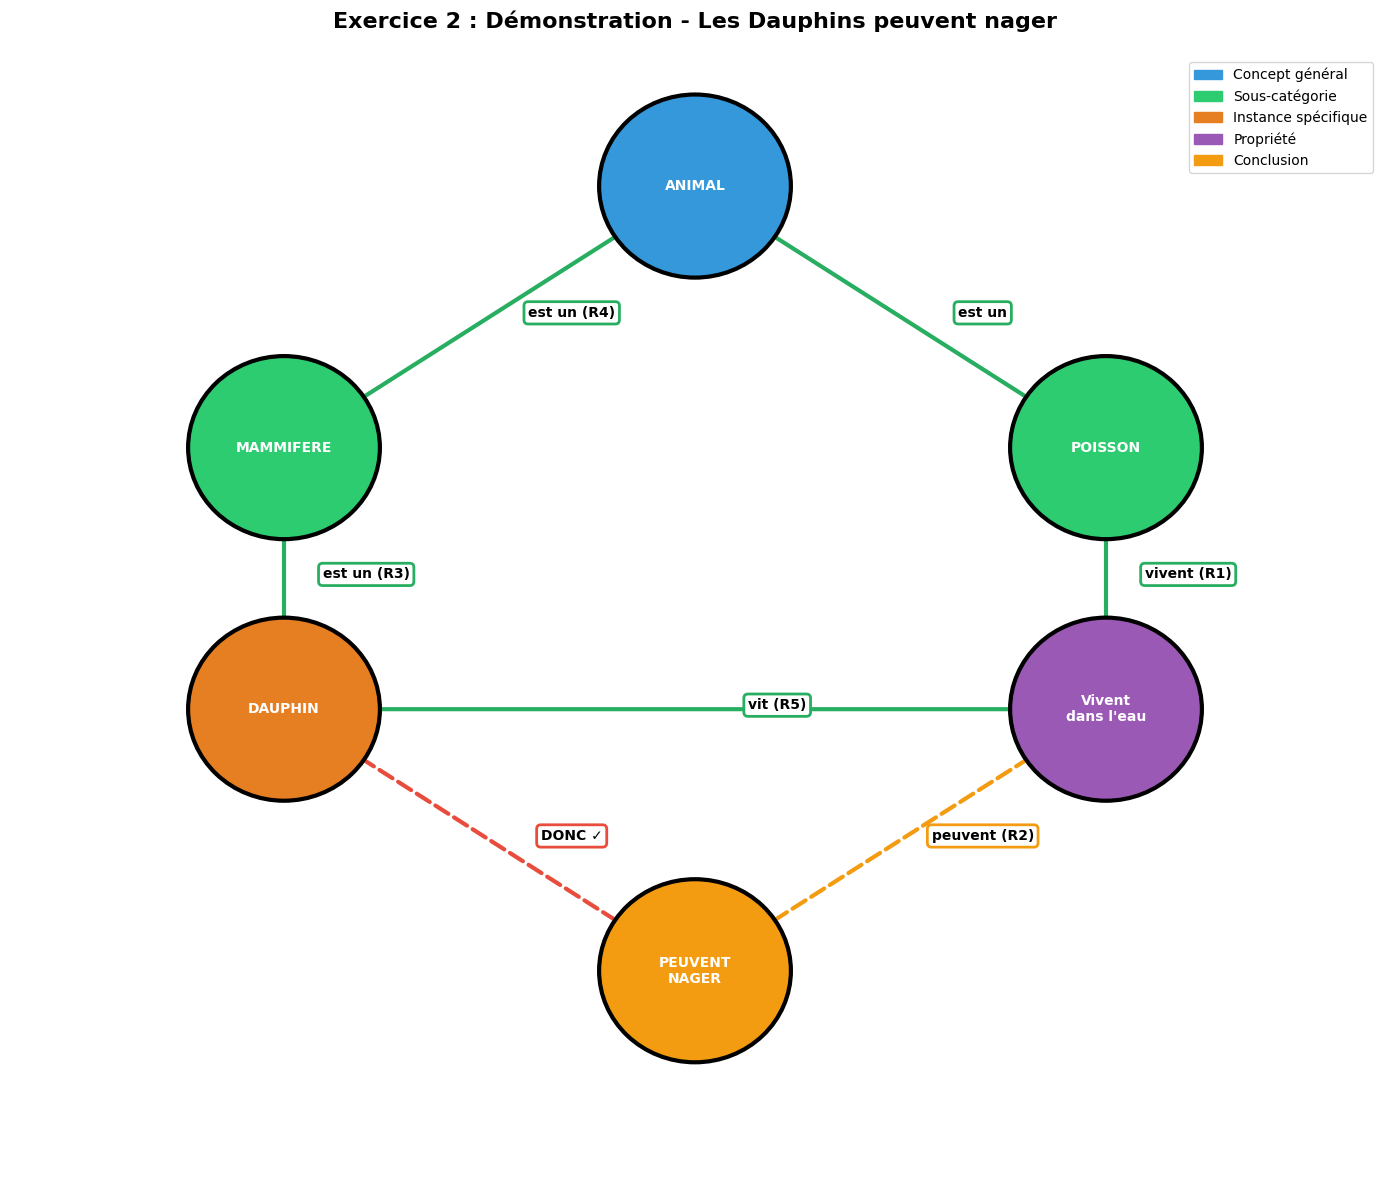

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches

# Configuration pour afficher le texte en français
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# ============================================================================
# EXERCICE 1 : Réseau Sémantique - La Chauve-souris
# ============================================================================

def exercice_1():
    print("=" * 70)
    print("EXERCICE 1 : Réseau Sémantique - La Chauve-souris")
    print("=" * 70)

    # Créer le graphe
    G = nx.DiGraph()

    # Ajouter les nœuds
    nodes = {
        'ANIMAL': {'pos': (0, 2), 'color': '#3498db'},
        'OISEAU': {'pos': (-1.5, 1), 'color': '#2ecc71'},
        'MAMMIFERE': {'pos': (1.5, 1), 'color': '#2ecc71'},
        'CHAUVE-SOURIS': {'pos': (0, 0), 'color': '#e74c3c'}
    }

    for node, attrs in nodes.items():
        G.add_node(node, pos=attrs['pos'], color=attrs['color'])

    # Ajouter les arêtes avec labels
    edges = [
        ('ANIMAL', 'OISEAU', 'est un'),
        ('ANIMAL', 'MAMMIFERE', 'est un'),
        ('OISEAU', 'CHAUVE-SOURIS', 'est un (CONFLIT)'),
        ('MAMMIFERE', 'CHAUVE-SOURIS', 'est un (CONFLIT)')
    ]

    for src, dst, label in edges:
        G.add_edge(src, dst, label=label)

    # Créer la figure
    fig, ax = plt.subplots(figsize=(14, 10))

    # Positions des nœuds
    pos = nx.get_node_attributes(G, 'pos')
    colors = [nodes[node]['color'] for node in G.nodes()]

    # Dessiner les arêtes
    for src, dst, data in G.edges(data=True):
        x1, y1 = pos[src]
        x2, y2 = pos[dst]

        # Couleur de l'arête
        edge_color = '#e74c3c' if 'CONFLIT' in data['label'] else '#27ae60'
        line_style = '--' if 'CONFLIT' in data['label'] else '-'

        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle='->', lw=2.5,
                                   color=edge_color, linestyle=line_style))

        # Label de l'arête
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        ax.text(mid_x + 0.2, mid_y, data['label'],
               fontsize=10, ha='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                        edgecolor=edge_color, linewidth=1.5))

    # Dessiner les nœuds
    for node in G.nodes():
        x, y = pos[node]
        circle = plt.Circle((x, y), 0.3, color=nodes[node]['color'],
                           ec='black', linewidth=2.5, zorder=3)
        ax.add_patch(circle)
        ax.text(x, y, node, ha='center', va='center',
               fontsize=11, fontweight='bold', color='white', zorder=4)

    # Ajouter les propriétés
    properties = [
        (-2.5, 0.7, 'peut voler', '#f39c12'),
        (2.5, 0.7, 'allaite ses petits', '#f39c12'),
        (0, -0.7, 'ne pond pas d\'œufs', '#c0392b')
    ]

    for x, y, text, color in properties:
        ax.text(x, y, text, fontsize=10, ha='center',
               bbox=dict(boxstyle='round,pad=0.5', facecolor=color,
                        alpha=0.3, edgecolor=color, linewidth=2))

    ax.set_xlim(-3, 3)
    ax.set_ylim(-1.5, 2.5)
    ax.axis('off')
    ax.set_title('Exercice 1 : Réseau Sémantique - La Chauve-souris',
                fontsize=16, fontweight='bold', pad=20)

    # Légende
    legend_elements = [
        mpatches.Patch(color='#3498db', label='Concept général'),
        mpatches.Patch(color='#2ecc71', label='Sous-catégorie'),
        mpatches.Patch(color='#e74c3c', label='Cas problématique')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=11)

    plt.tight_layout()
    plt.savefig('exercice1_reseau_semantique.png', dpi=300, bbox_inches='tight')
    print("\n✓ Graphique sauvegardé : exercice1_reseau_semantique.png")
    plt.show()



# ============================================================================
# EXERCICE 2 : Les Dauphins peuvent nager
# ============================================================================

def exercice_2():
    print("=" * 70)
    print("EXERCICE 2 : Les Dauphins peuvent nager - Démonstration")
    print("=" * 70)

    # Créer le graphe
    G = nx.DiGraph()

    # Ajouter les nœuds
    nodes = {
        'ANIMAL': {'pos': (0, 3), 'color': '#3498db'},
        'MAMMIFERE': {'pos': (-1.5, 2), 'color': '#2ecc71'},
        'POISSON': {'pos': (1.5, 2), 'color': '#2ecc71'},
        'DAUPHIN': {'pos': (-1.5, 1), 'color': '#e67e22'},
        'Vivent\ndans l\'eau': {'pos': (1.5, 1), 'color': '#9b59b6'},
        'PEUVENT\nNAGER': {'pos': (0, 0), 'color': '#f39c12'}
    }

    for node, attrs in nodes.items():
        G.add_node(node, pos=attrs['pos'], color=attrs['color'])

    # Ajouter les arêtes avec règles
    edges = [
        ('ANIMAL', 'MAMMIFERE', 'est un (R4)', False),
        ('ANIMAL', 'POISSON', 'est un', False),
        ('MAMMIFERE', 'DAUPHIN', 'est un (R3)', False),
        ('POISSON', 'Vivent\ndans l\'eau', 'vivent (R1)', False),
        ('DAUPHIN', 'Vivent\ndans l\'eau', 'vit (R5)', False),
        ('Vivent\ndans l\'eau', 'PEUVENT\nNAGER', 'peuvent (R2)', True),
        ('DAUPHIN', 'PEUVENT\nNAGER', 'DONC ✓', True)
    ]

    for src, dst, label, dashed in edges:
        G.add_edge(src, dst, label=label, dashed=dashed)

    # Créer la figure
    fig, ax = plt.subplots(figsize=(14, 12))

    # Positions des nœuds
    pos = nx.get_node_attributes(G, 'pos')

    # Dessiner les arêtes
    for src, dst, data in G.edges(data=True):
        x1, y1 = pos[src]
        x2, y2 = pos[dst]

        # Couleur et style
        if 'DONC' in data['label']:
            edge_color = '#e74c3c'
        elif data.get('dashed', False):
            edge_color = '#f39c12'
        else:
            edge_color = '#27ae60'

        line_style = '--' if data.get('dashed', False) else '-'

        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle='->', lw=3,
                                   color=edge_color, linestyle=line_style))

        # Label
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        ax.text(mid_x + 0.3, mid_y, data['label'],
               fontsize=10, ha='center', fontweight='bold',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                        edgecolor=edge_color, linewidth=2))

    # Dessiner les nœuds
    for node in G.nodes():
        x, y = pos[node]
        circle = plt.Circle((x, y), 0.35, color=nodes[node]['color'],
                           ec='black', linewidth=3, zorder=3)
        ax.add_patch(circle)
        ax.text(x, y, node, ha='center', va='center',
               fontsize=10, fontweight='bold', color='white', zorder=4)

    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-0.8, 3.5)
    ax.axis('off')
    ax.set_title('Exercice 2 : Démonstration - Les Dauphins peuvent nager',
                fontsize=16, fontweight='bold', pad=20)

    # Légende
    legend_elements = [
        mpatches.Patch(color='#3498db', label='Concept général'),
        mpatches.Patch(color='#2ecc71', label='Sous-catégorie'),
        mpatches.Patch(color='#e67e22', label='Instance spécifique'),
        mpatches.Patch(color='#9b59b6', label='Propriété'),
        mpatches.Patch(color='#f39c12', label='Conclusion')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.savefig('exercice2_demonstration.png', dpi=300, bbox_inches='tight')
    print("\n✓ Graphique sauvegardé : exercice2_demonstration.png")
    plt.show()




# ============================================================================
# PROGRAMME PRINCIPAL
# ============================================================================

if __name__ == "__main__":
    print("\n")
    print("╔" + "=" * 68 + "╗")
    print("║" + " " * 15 + "RÉSEAUX SÉMANTIQUES - EXERCICES" + " " * 22 + "║")
    print("╚" + "=" * 68 + "╝")
    print("\n")

    # Exécuter l'exercice 1
    exercice_1()

    print("\n" + "-" * 70 + "\n")

    # Exécuter l'exercice 2
    exercice_2()

EXERCICE 3 : Réseau Sémantique - Personnes et Domaines

✓ Graphique sauvegardé : exercice3_reseau.png


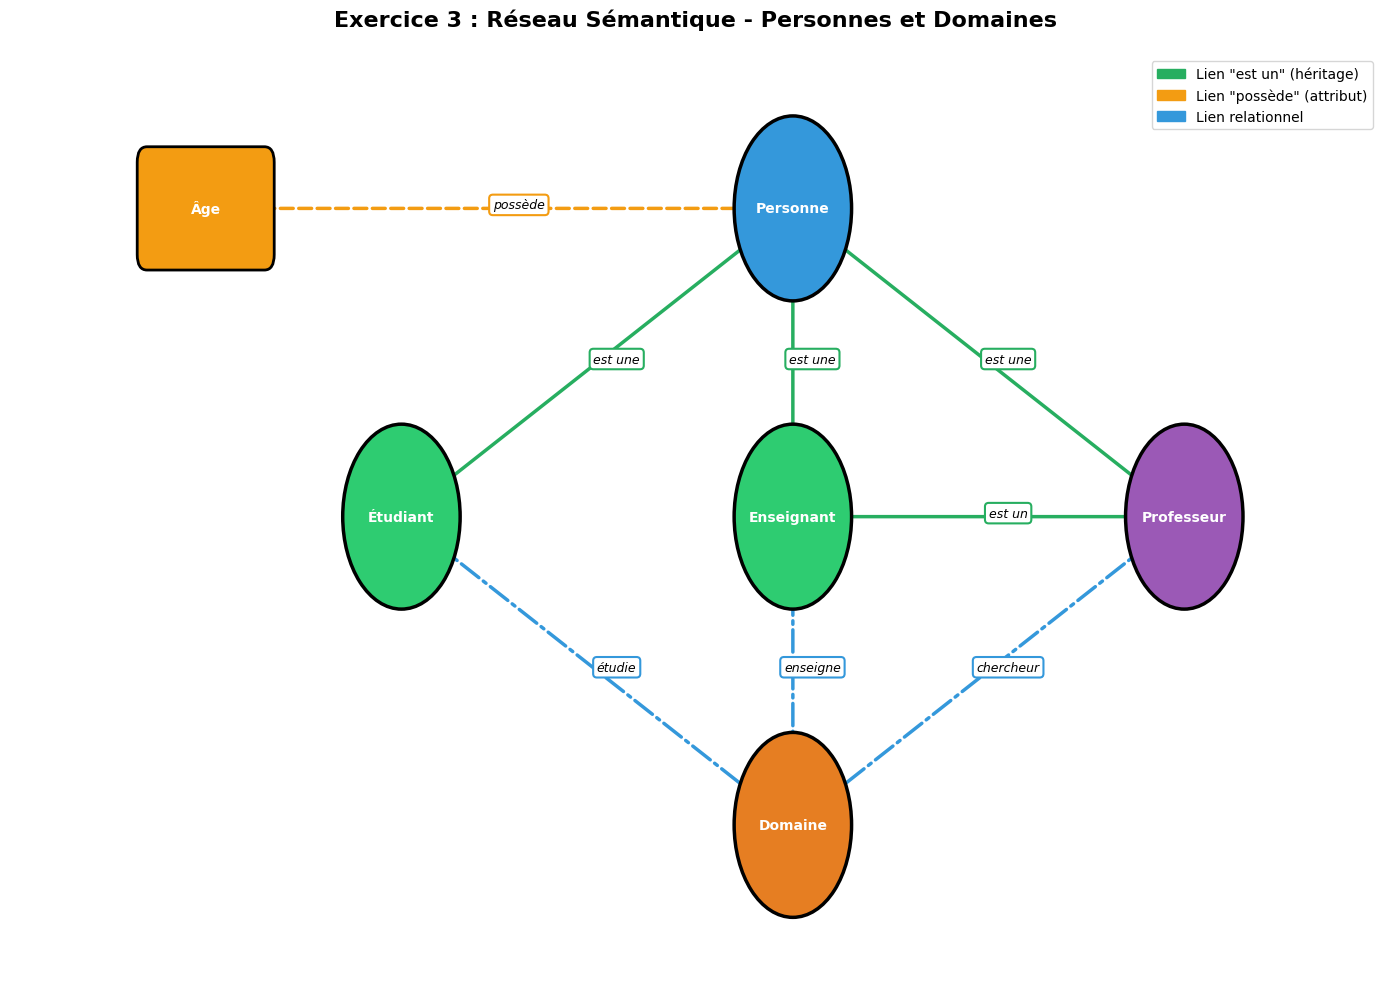


----------------------------------------------------------------------

EXERCICE 4 : Propagation d'activation
  Chien           : 1.000
  Animal          : 0.500
  Os              : 0.500
  ÊtreVivant      : 0.250
  Nourriture      : 0.250

✓ Graphique sauvegardé : exercice4_propagation.png



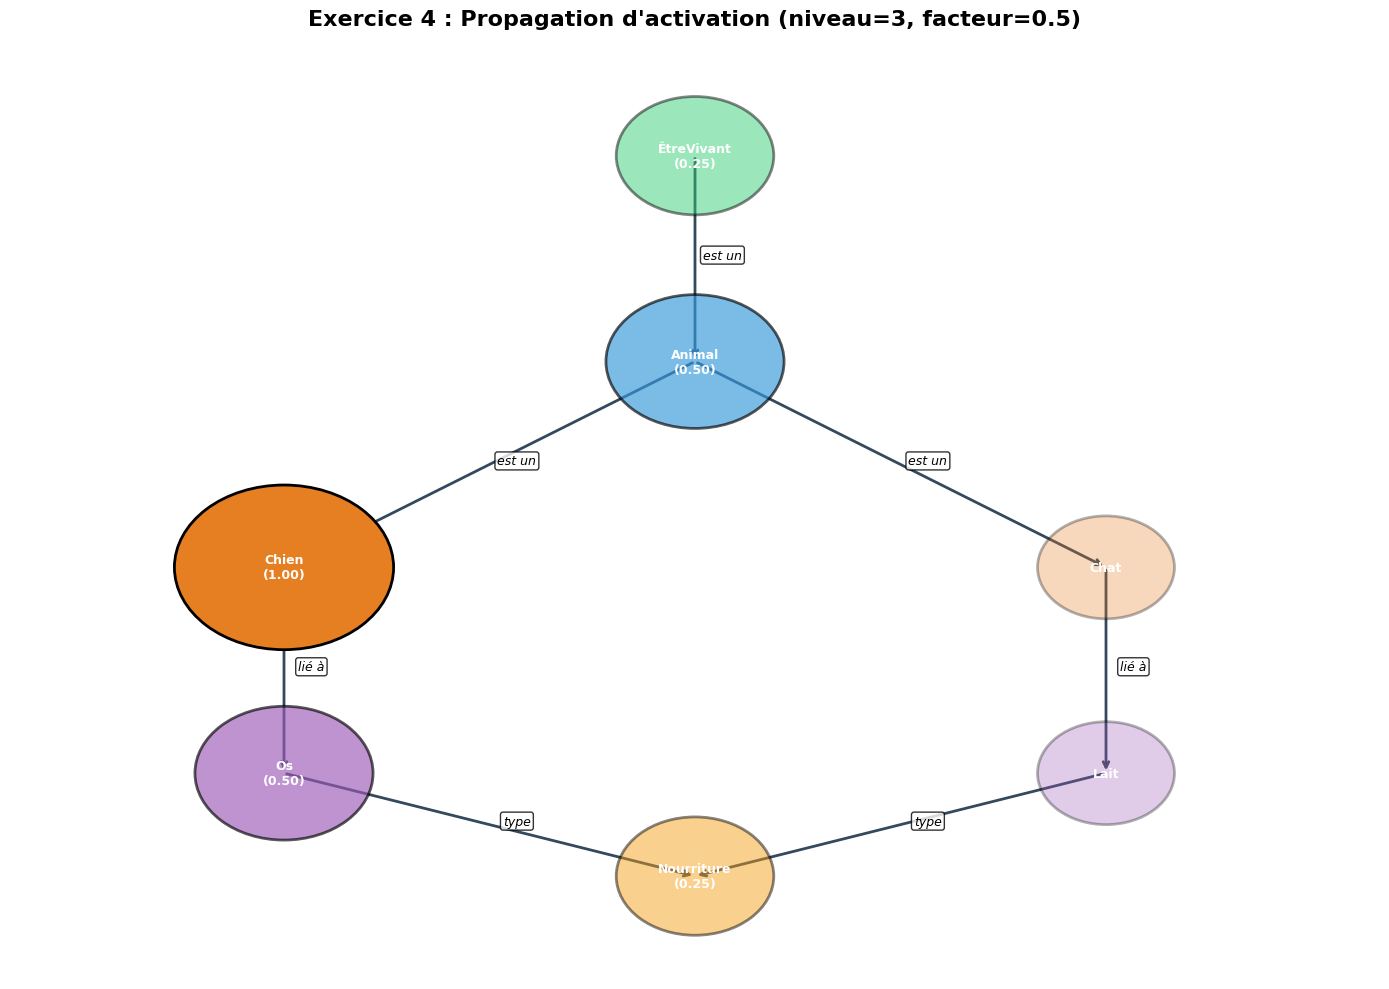

EXERCICE 5 : Propriétés héritées - Pingouin et Hibou

✓ Graphique sauvegardé : exercice5_oiseaux.png



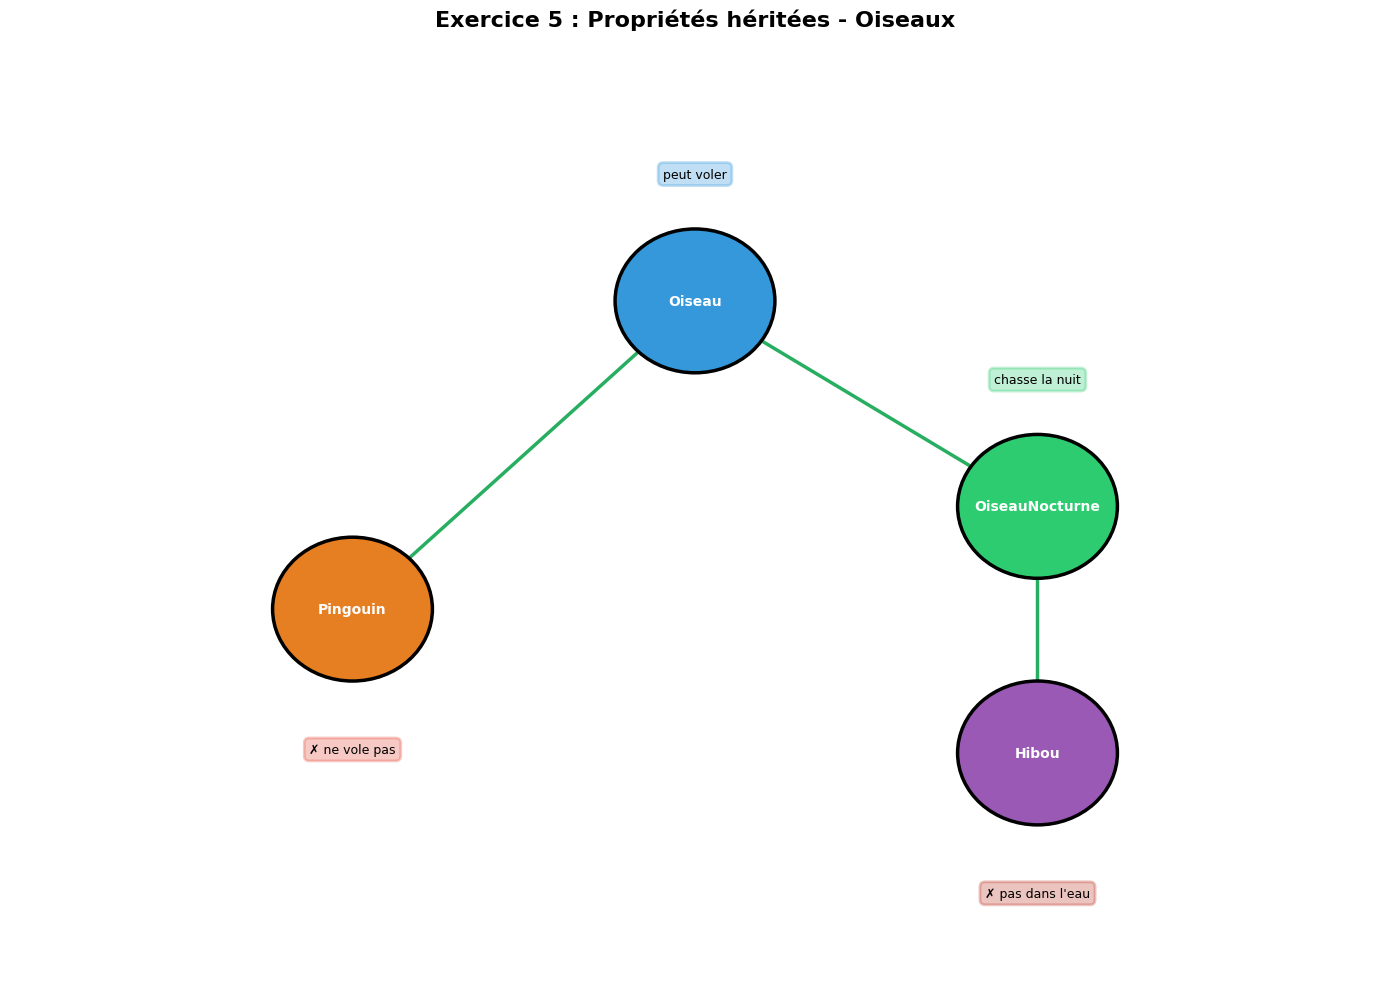

EXERCICE 6 : Traduction en réseau sémantique

✓ Graphique sauvegardé : exercice6_traduction.png



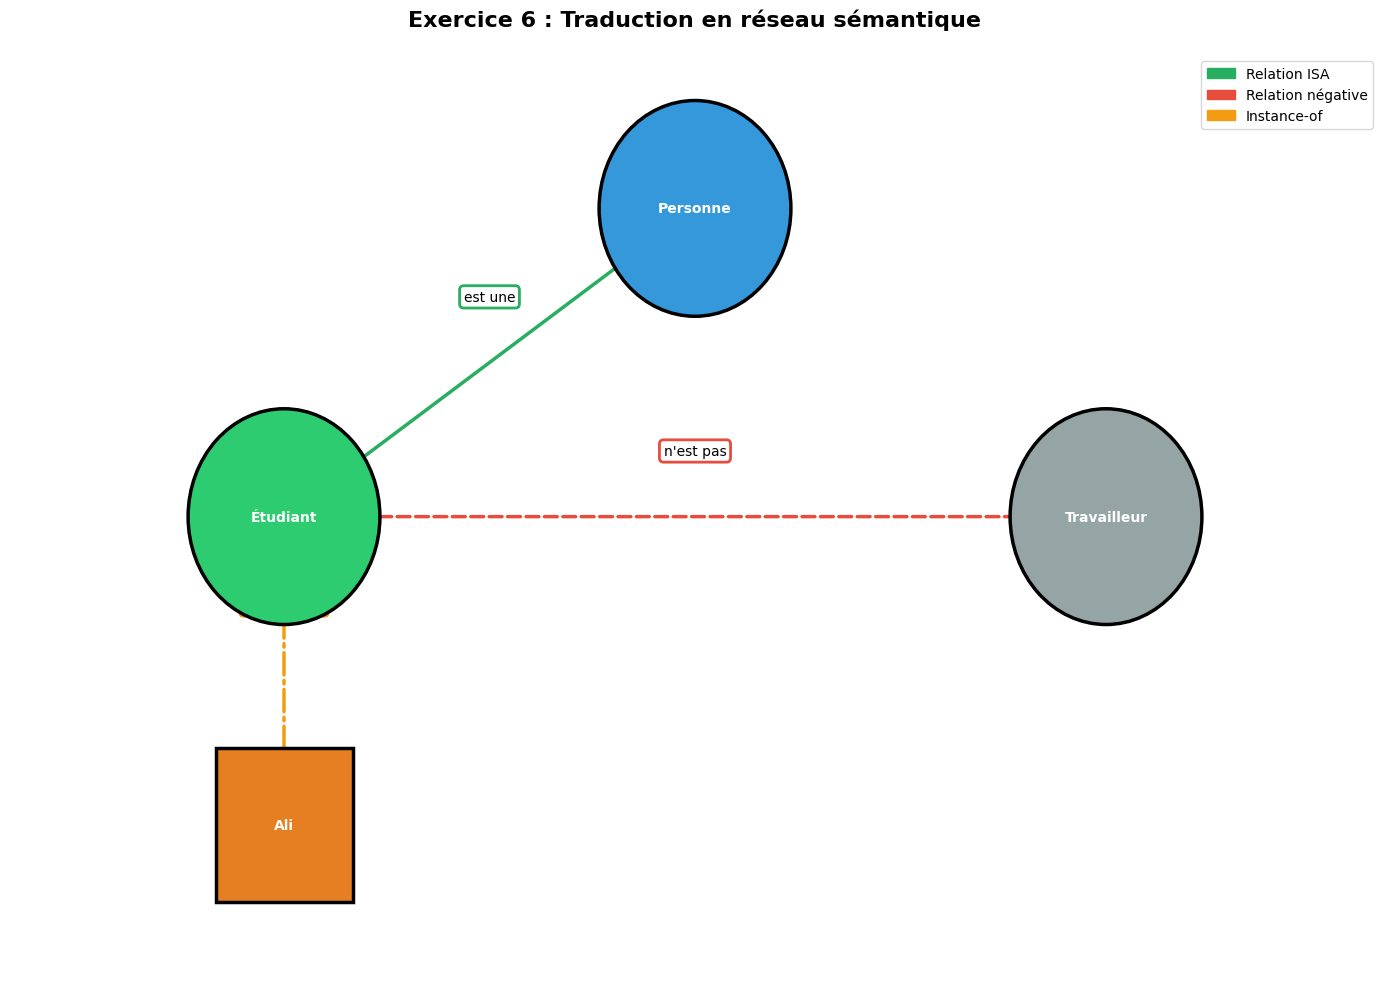

In [10]:
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import FancyBboxPatch
import matplotlib.patches as mpatches

# Configuration pour afficher le texte en français
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

def exercice_3():
    print("=" * 70)
    print("EXERCICE 3 : Réseau Sémantique - Personnes et Domaines")
    print("=" * 70)

    # Créer le graphe
    G = nx.DiGraph()

    # Ajouter les nœuds
    nodes = {
        'Personne': {'pos': (0, 3), 'color': '#3498db', 'type': 'concept'},
        'Étudiant': {'pos': (-2, 2), 'color': '#2ecc71', 'type': 'concept'},
        'Enseignant': {'pos': (0, 2), 'color': '#2ecc71', 'type': 'concept'},
        'Professeur': {'pos': (2, 2), 'color': '#9b59b6', 'type': 'concept'},
        'Domaine': {'pos': (0, 1), 'color': '#e67e22', 'type': 'concept'},
        'Âge': {'pos': (-3, 3), 'color': '#f39c12', 'type': 'attribut'}
    }

    for node, attrs in nodes.items():
        G.add_node(node, **attrs)

    # Ajouter les arêtes avec types
    edges = [
        ('Personne', 'Étudiant', 'est une', 'isa'),
        ('Personne', 'Enseignant', 'est une', 'isa'),
        ('Personne', 'Professeur', 'est une', 'isa'),
        ('Personne', 'Âge', 'possède', 'has'),
        ('Étudiant', 'Domaine', 'étudie', 'link'),
        ('Enseignant', 'Domaine', 'enseigne', 'link'),
        ('Professeur', 'Enseignant', 'est un', 'isa'),
        ('Professeur', 'Domaine', 'chercheur', 'link')
    ]

    for src, dst, label, edge_type in edges:
        G.add_edge(src, dst, label=label, edge_type=edge_type)

    # Créer la figure
    fig, ax = plt.subplots(figsize=(14, 10))

    # Positions des nœuds
    pos = nx.get_node_attributes(G, 'pos')

    # Dessiner les arêtes
    for src, dst, data in G.edges(data=True):
        x1, y1 = pos[src]
        x2, y2 = pos[dst]

        # Couleur selon le type
        if data['edge_type'] == 'isa':
            edge_color = '#27ae60'
            line_style = '-'
        elif data['edge_type'] == 'has':
            edge_color = '#f39c12'
            line_style = '--'
        else:
            edge_color = '#3498db'
            line_style = '-.'

        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle='->', lw=2.5,
                                   color=edge_color, linestyle=line_style))

        # Label
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        ax.text(mid_x + 0.1, mid_y, data['label'],
               fontsize=9, ha='center', style='italic',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                        edgecolor=edge_color, linewidth=1.5))

    # Dessiner les nœuds
    for node in G.nodes():
        x, y = pos[node]
        node_data = nodes[node]

        if node_data['type'] == 'attribut':
            # Rectangle pour attributs
            rect = FancyBboxPatch((x-0.3, y-0.15), 0.6, 0.3,
                                 boxstyle="round,pad=0.05",
                                 facecolor=node_data['color'],
                                 edgecolor='black', linewidth=2, zorder=3)
            ax.add_patch(rect)
        else:
            # Cercle pour concepts
            circle = plt.Circle((x, y), 0.3, color=node_data['color'],
                               ec='black', linewidth=2.5, zorder=3)
            ax.add_patch(circle)

        ax.text(x, y, node, ha='center', va='center',
               fontsize=10, fontweight='bold', color='white', zorder=4)

    ax.set_xlim(-4, 3)
    ax.set_ylim(0.5, 3.5)
    ax.axis('off')
    ax.set_title('Exercice 3 : Réseau Sémantique - Personnes et Domaines',
                fontsize=16, fontweight='bold', pad=20)

    # Légende
    legend_elements = [
        mpatches.Patch(color='#27ae60', label='Lien "est un" (héritage)'),
        mpatches.Patch(color='#f39c12', label='Lien "possède" (attribut)'),
        mpatches.Patch(color='#3498db', label='Lien relationnel')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.savefig('exercice3_reseau.png', dpi=300, bbox_inches='tight')
    print("\n✓ Graphique sauvegardé : exercice3_reseau.png")
    plt.show()






# ============================================================================
# EXERCICE 4 : Propagation d'activation
# ============================================================================

def exercice_4():
    print("=" * 70)
    print("EXERCICE 4 : Propagation d'activation")
    print("=" * 70)

    # Créer le réseau
    network = {
        'Chien': {'type': 'Animal', 'lie_a': ['Os']},
        'Chat': {'type': 'Animal', 'lie_a': ['Lait']},
        'Animal': {'type': 'ÊtreVivant'},
        'Os': {'type': 'Nourriture'},
        'Lait': {'type': 'Nourriture'}
    }

    # Graphe
    G = nx.DiGraph()

    nodes = {
        'Animal': {'pos': (0, 3), 'color': '#3498db'},
        'ÊtreVivant': {'pos': (0, 4), 'color': '#2ecc71'},
        'Chien': {'pos': (-1.5, 2), 'color': '#e67e22'},
        'Chat': {'pos': (1.5, 2), 'color': '#e67e22'},
        'Os': {'pos': (-1.5, 1), 'color': '#9b59b6'},
        'Lait': {'pos': (1.5, 1), 'color': '#9b59b6'},
        'Nourriture': {'pos': (0, 0.5), 'color': '#f39c12'}
    }

    for node, attrs in nodes.items():
        G.add_node(node, **attrs)

    edges = [
        ('ÊtreVivant', 'Animal', 'est un'),
        ('Animal', 'Chien', 'est un'),
        ('Animal', 'Chat', 'est un'),
        ('Chien', 'Os', 'lié à'),
        ('Chat', 'Lait', 'lié à'),
        ('Os', 'Nourriture', 'type'),
        ('Lait', 'Nourriture', 'type')
    ]

    for src, dst, label in edges:
        G.add_edge(src, dst, label=label)

    # Simulation de propagation
    niveau = 3
    facteur = 0.5

    activation = {
        'Chien': 1.0,
        'Animal': 0.0,
        'Os': 0.0,
        'ÊtreVivant': 0.0,
        'Nourriture': 0.0
    }

    # Niveau 1
    activation['Animal'] = activation['Chien'] * facteur
    activation['Os'] = activation['Chien'] * facteur

    # Niveau 2
    activation['ÊtreVivant'] = activation['Animal'] * facteur
    activation['Nourriture'] = activation['Os'] * facteur
    for node, val in activation.items():
        print(f"  {node:15} : {val:.3f}")

    # Créer la figure
    fig, ax = plt.subplots(figsize=(14, 10))
    pos = nx.get_node_attributes(G, 'pos')

    # Dessiner les arêtes
    for src, dst, data in G.edges(data=True):
        x1, y1 = pos[src]
        x2, y2 = pos[dst]
        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle='->', lw=2, color='#34495e'))
        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        ax.text(mid_x + 0.1, mid_y, data['label'],
               fontsize=9, ha='center', style='italic',
               bbox=dict(boxstyle='round,pad=0.2', facecolor='white', alpha=0.8))

    # Dessiner les nœuds avec intensité d'activation
    for node in G.nodes():
        x, y = pos[node]
        node_color = nodes[node]['color']

        # Intensité selon activation
        if node in activation:
            alpha = 0.3 + 0.7 * activation[node]
            size = 0.25 + 0.15 * activation[node]
        else:
            alpha = 0.3
            size = 0.25

        circle = plt.Circle((x, y), size, color=node_color,
                           ec='black', linewidth=2, alpha=alpha, zorder=3)
        ax.add_patch(circle)

        # Afficher valeur d'activation
        if node in activation:
            label = f"{node}\n({activation[node]:.2f})"
        else:
            label = node

        ax.text(x, y, label, ha='center', va='center',
               fontsize=9, fontweight='bold', color='white', zorder=4)

    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(0, 4.5)
    ax.axis('off')
    ax.set_title('Exercice 4 : Propagation d\'activation (niveau=3, facteur=0.5)',
                fontsize=16, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.savefig('exercice4_propagation.png', dpi=300, bbox_inches='tight')
    print("\n✓ Graphique sauvegardé : exercice4_propagation.png\n")
    plt.show()


# ============================================================================
# EXERCICE 5 : Propriétés héritées - Oiseaux
# ============================================================================

def exercice_5():
    print("=" * 70)
    print("EXERCICE 5 : Propriétés héritées - Pingouin et Hibou")
    print("=" * 70)

    # Base de connaissances
    rules = [
        "Les oiseaux peuvent voler",
        "Les oiseaux nocturnes chassent la nuit",
        "Les hiboux sont des oiseaux nocturnes",
        "Les pingouins sont des oiseaux mais ne volent pas",
        "Les hiboux ne vivent pas dans l'eau"
    ]


    # Graphe
    G = nx.DiGraph()

    nodes = {
        'Oiseau': {'pos': (0, 3), 'color': '#3498db'},
        'OiseauNocturne': {'pos': (1.5, 2), 'color': '#2ecc71'},
        'Pingouin': {'pos': (-1.5, 1.5), 'color': '#e67e22'},
        'Hibou': {'pos': (1.5, 0.8), 'color': '#9b59b6'}
    }

    for node, attrs in nodes.items():
        G.add_node(node, **attrs)

    edges = [
        ('Oiseau', 'OiseauNocturne', 'est un'),
        ('Oiseau', 'Pingouin', 'est un'),
        ('OiseauNocturne', 'Hibou', 'est un')
    ]

    for src, dst, label in edges:
        G.add_edge(src, dst, label=label)

    fig, ax = plt.subplots(figsize=(14, 10))
    pos = nx.get_node_attributes(G, 'pos')

    # Dessiner arêtes
    for src, dst, data in G.edges(data=True):
        x1, y1 = pos[src]
        x2, y2 = pos[dst]
        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle='->', lw=2.5, color='#27ae60'))

    # Dessiner nœuds
    for node in G.nodes():
        x, y = pos[node]
        circle = plt.Circle((x, y), 0.35, color=nodes[node]['color'],
                           ec='black', linewidth=2.5, zorder=3)
        ax.add_patch(circle)
        ax.text(x, y, node, ha='center', va='center',
               fontsize=10, fontweight='bold', color='white', zorder=4)

    # Propriétés
    properties = [
        (0, 3.6, 'peut voler', '#3498db'),
        (1.5, 2.6, 'chasse la nuit', '#2ecc71'),
        (-1.5, 0.8, '✗ ne vole pas', '#e74c3c'),
        (1.5, 0.1, '✗ pas dans l\'eau', '#c0392b')
    ]

    for x, y, text, color in properties:
        ax.text(x, y, text, fontsize=9, ha='center',
               bbox=dict(boxstyle='round,pad=0.4', facecolor=color,
                        alpha=0.3, edgecolor=color, linewidth=2))

    ax.set_xlim(-3, 3)
    ax.set_ylim(-0.3, 4.2)
    ax.axis('off')
    ax.set_title('Exercice 5 : Propriétés héritées - Oiseaux',
                fontsize=16, fontweight='bold', pad=20)

    plt.tight_layout()
    plt.savefig('exercice5_oiseaux.png', dpi=300, bbox_inches='tight')
    print("\n✓ Graphique sauvegardé : exercice5_oiseaux.png\n")
    plt.show()


# ============================================================================
# EXERCICE 6 : Traduction en réseau sémantique
# ============================================================================

def exercice_6():
    print("=" * 70)
    print("EXERCICE 6 : Traduction en réseau sémantique")
    print("=" * 70)

    # Graphe
    G = nx.DiGraph()

    nodes = {
        'Personne': {'pos': (0, 3), 'color': '#3498db'},
        'Étudiant': {'pos': (-1.5, 2), 'color': '#2ecc71'},
        'Travailleur': {'pos': (1.5, 2), 'color': '#95a5a6'},
        'Ali': {'pos': (-1.5, 1), 'color': '#e67e22'}
    }

    for node, attrs in nodes.items():
        G.add_node(node, **attrs)

    edges = [
        ('Étudiant', 'Personne', 'est une', 'isa'),
        ('Étudiant', 'Travailleur', 'n\'est pas', 'neg'),
        ('Ali', 'Étudiant', 'instance de', 'instanceof')
    ]

    fig, ax = plt.subplots(figsize=(14, 10))
    pos = nx.get_node_attributes(G, 'pos')

    # Dessiner arêtes
    for src, dst, label, edge_type in edges:
        x1, y1 = pos[src]
        x2, y2 = pos[dst]

        if edge_type == 'neg':
            color = '#e74c3c'
            style = '--'
        elif edge_type == 'instanceof':
            color = '#f39c12'
            style = '-.'
        else:
            color = '#27ae60'
            style = '-'

        ax.annotate('', xy=(x2, y2), xytext=(x1, y1),
                    arrowprops=dict(arrowstyle='->', lw=2.5,
                                   color=color, linestyle=style))

        mid_x, mid_y = (x1 + x2) / 2, (y1 + y2) / 2
        ax.text(mid_x, mid_y + 0.2, label, fontsize=10, ha='center',
               bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                        edgecolor=color, linewidth=2))

    # Dessiner nœuds
    for node in G.nodes():
        x, y = pos[node]

        if node == 'Ali':
            # Carré pour instance
            rect = plt.Rectangle((x-0.25, y-0.25), 0.5, 0.5,
                                facecolor=nodes[node]['color'],
                                edgecolor='black', linewidth=2.5, zorder=3)
            ax.add_patch(rect)
        else:
            circle = plt.Circle((x, y), 0.35, color=nodes[node]['color'],
                               ec='black', linewidth=2.5, zorder=3)
            ax.add_patch(circle)

        ax.text(x, y, node, ha='center', va='center',
               fontsize=10, fontweight='bold', color='white', zorder=4)

    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(0.5, 3.5)
    ax.axis('off')
    ax.set_title('Exercice 6 : Traduction en réseau sémantique',
                fontsize=16, fontweight='bold', pad=20)

    legend_elements = [
        mpatches.Patch(color='#27ae60', label='Relation ISA'),
        mpatches.Patch(color='#e74c3c', label='Relation négative'),
        mpatches.Patch(color='#f39c12', label='Instance-of')
    ]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.savefig('exercice6_traduction.png', dpi=300, bbox_inches='tight')

    print("\n✓ Graphique sauvegardé : exercice6_traduction.png\n")
    plt.show()

if __name__ == "__main__":

  # Exécuter l'exercice 1
  exercice_3()

  print("\n" + "-" * 70 + "\n")

  # Exécuter l'exercice 2
  exercice_4()
  exercice_5()
  exercice_6()